# Comprehensive Data Analysis: train_2017_clean.parquet

This notebook performs:
1. Data Cleaning
2. Data Preprocessing
3. Exploratory Data Analysis (EDA)
4. Feature Engineering

In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import warnings
warnings.filterwarnings('ignore')

# Set visualization style
sns.set_style('whitegrid')
plt.rcParams['figure.figsize'] = (12, 6)

print("Libraries imported successfully!")

Libraries imported successfully!


In [2]:
# Load the dataset
df = pd.read_parquet('gs://aswitha-ml-data-001/train_2017_clean.parquet')

print(f"Dataset shape: {df.shape}")
print(f"\nDataset size: {df.shape[0]:,} rows × {df.shape[1]} columns")
print(f"Memory usage: {df.memory_usage(deep=True).sum() / 1024**2:.2f} MB")

Dataset shape: (23808261, 20)

Dataset size: 23,808,261 rows × 20 columns
Memory usage: 4220.58 MB


## 1. Data Cleaning

In this section, we'll:
- Check for missing values
- Identify and handle duplicates
- Detect and handle outliers
- Validate data types
- Check for data inconsistencies

In [3]:
# Display basic information
print("=" * 80)
print("DATASET OVERVIEW")
print("=" * 80)
df.info()
print("\n" + "=" * 80)
print("FIRST FEW ROWS")
print("=" * 80)
df.head(10)

DATASET OVERVIEW
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23808261 entries, 0 to 23808260
Data columns (total 20 columns):
 #   Column          Dtype         
---  ------          -----         
 0   id              int64         
 1   date            datetime64[ns]
 2   store_nbr       int64         
 3   item_nbr        int64         
 4   unit_sales      float64       
 5   onpromotion     object        
 6   city            category      
 7   state           category      
 8   type            category      
 9   cluster         int64         
 10  family          category      
 11  class           int64         
 12  perishable      int64         
 13  transactions    int64         
 14  dcoilwtico      float64       
 15  is_holiday      int64         
 16  is_event        int64         
 17  is_work_day     int64         
 18  unit_sales_raw  float64       
 19  log_sales       float64       
dtypes: category(4), datetime64[ns](1), float64(4), int64(10), object(1)
mem

,id,date,store_nbr,item_nbr,unit_sales,onpromotion,city,state,type,cluster,family,class,perishable,transactions,dcoilwtico,is_holiday,is_event,is_work_day,unit_sales_raw,log_sales
0,101688779,2017-01-01,25,99197,1.0,False,Salinas,Santa Elena,D,1,GROCERY I,1067,0,1642,53.75,0,0,0,1.0,0.693147
1,101688780,2017-01-01,25,103665,7.0,False,Salinas,Santa Elena,D,1,BREAD/BAKERY,2712,1,1642,53.75,0,0,0,7.0,2.079442
2,101688781,2017-01-01,25,105574,1.0,False,Salinas,Santa Elena,D,1,GROCERY I,1045,0,1642,53.75,0,0,0,1.0,0.693147
3,101688782,2017-01-01,25,105857,4.0,False,Salinas,Santa Elena,D,1,GROCERY I,1092,0,1642,53.75,0,0,0,4.0,1.609438
4,101688783,2017-01-01,25,106716,2.0,False,Salinas,Santa Elena,D,1,GROCERY I,1032,0,1642,53.75,0,0,0,2.0,1.098612
5,101688784,2017-01-01,25,108698,2.0,False,Salinas,Santa Elena,D,1,DELI,2644,1,1642,53.75,0,0,0,2.0,1.098612
6,101688785,2017-01-01,25,108786,1.0,False,Salinas,Santa Elena,D,1,CLEANING,3044,0,1642,53.75,0,0,0,1.0,0.693147
7,101688786,2017-01-01,25,108797,1.0,False,Salinas,Santa Elena,D,1,GROCERY I,1004,0,1642,53.75,0,0,0,1.0,0.693147
8,101688787,2017-01-01,25,108862,1.0,False,Salinas,Santa Elena,D,1,GROCERY I,1062,0,1642,53.75,0,0,0,1.0,0.693147
9,101688788,2017-01-01,25,108952,2.0,False,Salinas,Santa Elena,D,1,CLEANING,3024,0,1642,53.75,0,0,0,2.0,1.098612


In [5]:
# Check for missing values
print("=" * 80)
print("MISSING VALUES ANALYSIS")
print("=" * 80)

missing_values = df.isnull().sum()
missing_percentage = (df.isnull().sum() / len(df)) * 100

missing_df = pd.DataFrame({
    'Column': missing_values.index,
    'Missing Count': missing_values.values,
    'Percentage': missing_percentage.values
})

missing_df = missing_df[missing_df['Missing Count'] > 0].sort_values('Missing Count', ascending=False)

if len(missing_df) > 0:
    print(missing_df.to_string(index=False))
else:
    print("✓ No missing values found in the dataset!")

MISSING VALUES ANALYSIS
✓ No missing values found in the dataset!


In [6]:
# Check for duplicates
print("=" * 80)
print("DUPLICATE ANALYSIS")
print("=" * 80)

duplicates = df.duplicated().sum()
print(f"Total duplicate rows: {duplicates:,}")

if duplicates > 0:
    print(f"Percentage of duplicates: {(duplicates/len(df))*100:.2f}%")
    # Remove duplicates
    df_clean = df.drop_duplicates()
    print(f"Rows after removing duplicates: {len(df_clean):,}")
else:
    print("✓ No duplicate rows found!")
    df_clean = df.copy()

DUPLICATE ANALYSIS
Total duplicate rows: 0
✓ No duplicate rows found!


In [7]:
# Data type validation and conversion
print("=" * 80)
print("DATA TYPES")
print("=" * 80)
print(df_clean.dtypes)

# Check onpromotion column (should be boolean)
print("\n" + "=" * 80)
print("ONPROMOTION COLUMN ANALYSIS")
print("=" * 80)
print(f"Data type: {df_clean['onpromotion'].dtype}")
print(f"Unique values: {df_clean['onpromotion'].unique()}")
print(f"Value counts:\n{df_clean['onpromotion'].value_counts()}")

DATA TYPES
id                         int64
date              datetime64[ns]
store_nbr                  int64
item_nbr                   int64
unit_sales               float64
onpromotion               object
city                    category
state                   category
type                    category
cluster                    int64
family                  category
class                      int64
perishable                 int64
transactions               int64
dcoilwtico               float64
is_holiday                 int64
is_event                   int64
is_work_day                int64
unit_sales_raw           float64
log_sales                float64
dtype: object

ONPROMOTION COLUMN ANALYSIS
Data type: object
Unique values: ['False' 'True']
Value counts:
onpromotion
False    21058612
True      2749649
Name: count, dtype: int64


In [8]:
# Fix impossible negatives (if any)
df_clean.loc[df_clean["unit_sales"] < 0, "unit_sales"] = 0
df_clean.loc[df_clean["unit_sales_raw"] < 0, "unit_sales_raw"] = 0
df_clean.loc[df_clean["transactions"] < 0, "transactions"] = 0

In [9]:
# Outlier detection for numerical columns
print("=" * 80)
print("OUTLIER DETECTION (Using IQR Method)")
print("=" * 80)

numerical_cols = df_clean.select_dtypes(include=[np.number]).columns
outlier_summary = []

for col in numerical_cols:
    Q1 = df_clean[col].quantile(0.25)
    Q3 = df_clean[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    outliers = df_clean[(df_clean[col] < lower_bound) | (df_clean[col] > upper_bound)]
    outlier_count = len(outliers)
    outlier_pct = (outlier_count / len(df_clean)) * 100
    
    outlier_summary.append({
        'Column': col,
        'Outlier Count': outlier_count,
        'Percentage': f"{outlier_pct:.2f}%",
        'Lower Bound': f"{lower_bound:.2f}",
        'Upper Bound': f"{upper_bound:.2f}"
    })

outlier_df = pd.DataFrame(outlier_summary)
outlier_df = outlier_df[outlier_df['Outlier Count'] > 0].sort_values('Outlier Count', ascending=False)
print(outlier_df.to_string(index=False))

OUTLIER DETECTION (Using IQR Method)
        Column  Outlier Count Percentage Lower Bound Upper Bound
    unit_sales        2315382      9.73%       -7.00       17.00
unit_sales_raw        2315382      9.73%       -7.00       17.00
    is_holiday        2259109      9.49%        0.00        0.00
  transactions        1169685      4.91%     -544.00     3968.00
         class         761145      3.20%    -1417.00     5183.00
     log_sales         509628      2.14%       -0.55        3.85


## 2. Data Preprocessing

In this section, we'll:
- Handle categorical variables
- Normalize/standardize numerical features
- Handle date features
- Create train-test splits if needed
- Address data imbalances

In [10]:
# Categorical variables analysis
print("=" * 80)
print("CATEGORICAL VARIABLES")
print("=" * 80)

categorical_cols = df_clean.select_dtypes(include=['object', 'category']).columns

for col in categorical_cols:
    unique_count = df_clean[col].nunique()
    print(f"\n{col}:")
    print(f"  Unique values: {unique_count}")
    if unique_count <= 20:
        print(f"  Value counts:\n{df_clean[col].value_counts()}")
    else:
        print(f"  Top 10 values:\n{df_clean[col].value_counts().head(10)}")

CATEGORICAL VARIABLES

onpromotion:
  Unique values: 2
  Value counts:
onpromotion
False    21058612
True      2749649
Name: count, dtype: int64

city:
  Unique values: 22
  Top 10 values:
city
Quito            9528118
Guayaquil        3138204
Cuenca           1451431
Santo Domingo    1187449
Ambato            977683
Machala           846001
Manta             742437
Latacunga         649127
Loja              477176
Daule             471973
Name: count, dtype: int64

state:
  Unique values: 16
  Value counts:
state
Pichincha                         9993056
Guayas                            4271193
Azuay                             1451431
Santo Domingo de los Tsachilas    1187449
Manabi                            1039867
Tungurahua                         977683
El Oro                             846001
Los Rios                           764104
Cotopaxi                           649127
Loja                               477176
Esmeraldas                         415335
Santa Elena       

In [11]:
# Convert onpromotion to boolean if needed
if df_clean['onpromotion'].dtype == 'object':
    # Map string values to boolean
    promotion_map = {'True': True, 'False': False, 'true': True, 'false': False, '1': True, '0': False}
    df_clean['onpromotion'] = df_clean['onpromotion'].map(promotion_map).fillna(False).astype(bool)
    print("✓ Converted 'onpromotion' to boolean type")
else:
    print("✓ 'onpromotion' is already in correct format")

print(f"\nOnpromotion distribution:\n{df_clean['onpromotion'].value_counts()}")

✓ Converted 'onpromotion' to boolean type

Onpromotion distribution:
onpromotion
False    21058612
True      2749649
Name: count, dtype: int64


In [12]:
# Encode categorical variables
from sklearn.preprocessing import LabelEncoder

df_encoded = df_clean.copy()

# Label encode categorical columns
label_encoders = {}
for col in ['city', 'state', 'type', 'family']:
    le = LabelEncoder()
    df_encoded[f'{col}_encoded'] = le.fit_transform(df_encoded[col])
    label_encoders[col] = le
    print(f"✓ Encoded '{col}' - {len(le.classes_)} unique categories")

print("\nEncoded columns created successfully!")

✓ Encoded 'city' - 22 unique categories
✓ Encoded 'state' - 16 unique categories
✓ Encoded 'type' - 5 unique categories
✓ Encoded 'family' - 33 unique categories

Encoded columns created successfully!


In [13]:
# Normalize numerical features
from sklearn.preprocessing import StandardScaler, MinMaxScaler

# Select numerical columns for scaling (excluding IDs and already scaled features)
cols_to_scale = ['unit_sales', 'transactions', 'dcoilwtico']

# StandardScaler (Z-score normalization)
scaler_standard = StandardScaler()
df_encoded[['unit_sales_scaled', 'transactions_scaled', 'dcoilwtico_scaled']] = \
    scaler_standard.fit_transform(df_encoded[cols_to_scale])

# MinMaxScaler (0-1 normalization)
scaler_minmax = MinMaxScaler()
df_encoded[['unit_sales_minmax', 'transactions_minmax', 'dcoilwtico_minmax']] = \
    scaler_minmax.fit_transform(df_encoded[cols_to_scale])

print("✓ Created standardized features (Z-score)")
print("✓ Created min-max normalized features (0-1)")
print(f"\nDataset shape after preprocessing: {df_encoded.shape}")

✓ Created standardized features (Z-score)
✓ Created min-max normalized features (0-1)

Dataset shape after preprocessing: (23808261, 30)


In [14]:
# Remove log_sales feature (unit_sales is the real target variable)
if 'log_sales' in df_encoded.columns:
    df_encoded = df_encoded.drop('log_sales', axis=1)
    print("✓ Removed 'log_sales' feature")
    print(f"Updated dataset shape: {df_encoded.shape}")
else:
    print("'log_sales' column not found")

✓ Removed 'log_sales' feature
Updated dataset shape: (23808261, 29)


## 3. Exploratory Data Analysis (EDA)

In this section, we'll:
- Analyze statistical summaries
- Visualize distributions
- Explore correlations
- Analyze temporal patterns
- Examine categorical relationships

In [15]:
# Statistical summary
print("=" * 80)
print("STATISTICAL SUMMARY")
print("=" * 80)
df_encoded.describe()

STATISTICAL SUMMARY


,id,date,store_nbr,item_nbr,unit_sales,cluster,class,perishable,transactions,dcoilwtico,...,city_encoded,state_encoded,type_encoded,family_encoded,unit_sales_scaled,transactions_scaled,dcoilwtico_scaled,unit_sales_minmax,transactions_minmax,dcoilwtico_minmax
count,2.380826e+07,23808261,2.380826e+07,2.380826e+07,2.380826e+07,2.380826e+07,2.380826e+07,2.380826e+07,2.380826e+07,2.380826e+07,...,2.380826e+07,2.380826e+07,2.380826e+07,2.380826e+07,2.380826e+07,2.380826e+07,2.380826e+07,2.380826e+07,2.380826e+07,2.380826e+07
mean,1.135929e+08,2017-04-24 15:38:17.344117248,2.794909e+01,1.160406e+06,8.158616e+00,8.683822e+00,1.972080e+03,2.558522e-01,1.845406e+03,4.945798e+01,...,1.283787e+01,9.134440e+00,1.927121e+00,1.204105e+01,-4.788477e-16,-7.430056e-17,-8.715482e-14,4.758320e-04,2.825430e-01,6.019092e-01
min,1.016888e+08,2017-01-01 00:00:00,1.000000e+00,9.699500e+04,0.000000e+00,1.000000e+00,1.002000e+03,0.000000e+00,5.070000e+02,4.253000e+01,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,-3.403577e-01,-1.330699e+00,-2.215984e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.076408e+08,2017-02-27 00:00:00,1.300000e+01,6.875490e+05,2.000000e+00,5.000000e+00,1.058000e+03,0.000000e+00,1.148000e+03,4.710000e+01,...,8.000000e+00,6.000000e+00,1.000000e+00,7.000000e+00,-2.569226e-01,-6.933901e-01,-7.542225e-01,1.166453e-04,1.353177e-01,3.970460e-01
50%,1.135929e+08,2017-04-25 00:00:00,2.800000e+01,1.176562e+06,4.000000e+00,9.000000e+00,1.190000e+03,0.000000e+00,1.513000e+03,4.937000e+01,...,1.600000e+01,1.200000e+01,2.000000e+00,1.200000e+01,-1.734874e-01,-3.304920e-01,-2.813981e-02,2.332906e-04,2.123707e-01,5.942659e-01
75%,1.195450e+08,2017-06-20 00:00:00,4.300000e+01,1.501544e+06,8.000000e+00,1.300000e+01,2.708000e+03,1.000000e+00,2.276000e+03,5.245000e+01,...,1.800000e+01,1.200000e+01,3.000000e+00,1.200000e+01,-6.617074e-03,4.281141e-01,9.570297e-01,4.665811e-04,3.734431e-01,8.618593e-01
max,1.254970e+08,2017-08-15 00:00:00,5.400000e+01,2.127114e+06,1.714600e+04,1.700000e+01,7.780000e+03,1.000000e+00,5.244000e+03,5.404000e+01,...,2.100000e+01,1.500000e+01,4.000000e+00,3.200000e+01,7.149493e+02,3.379022e+00,1.465607e+00,1.000000e+00,1.000000e+00,1.000000e+00
std,6.872853e+06,NaN,1.621998e+01,5.795109e+05,2.397071e+01,4.585382e+00,1.198036e+03,4.363391e-01,1.005792e+03,3.126366e+00,...,6.362225e+00,4.148543e+00,1.282981e+00,7.855497e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.398035e-03,2.123268e-01,2.716217e-01


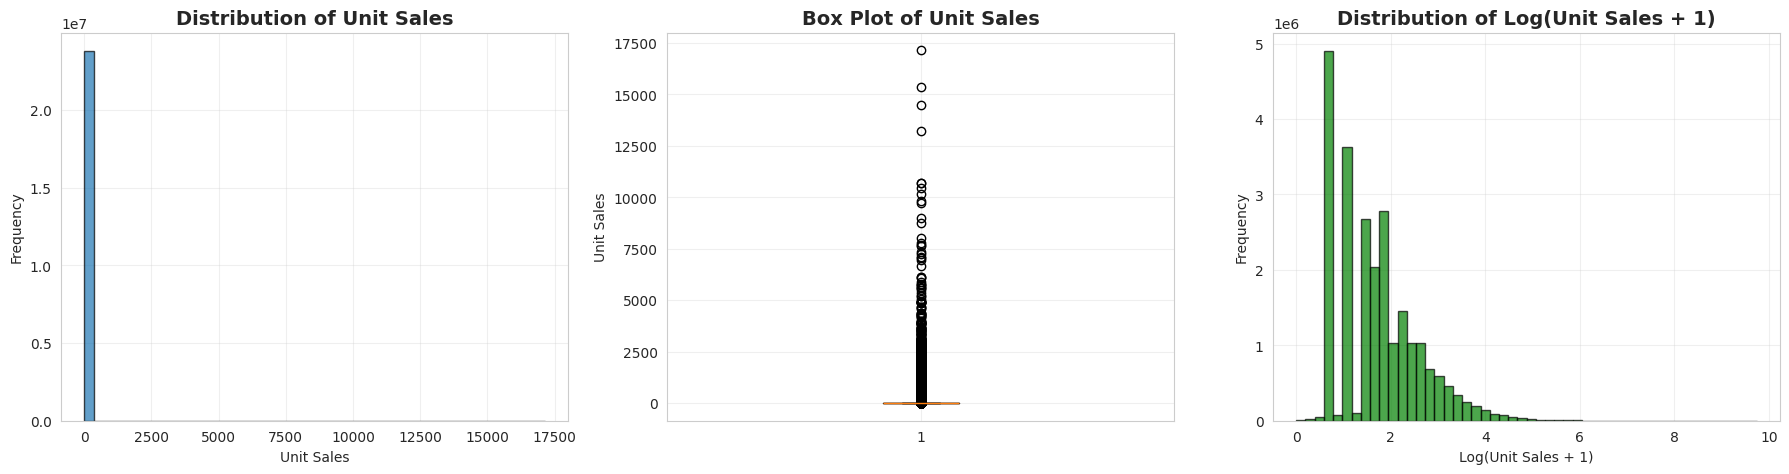

Unit Sales Statistics:
  Mean: 8.16
  Median: 4.00
  Std Dev: 23.97
  Min: 0.00
  Max: 17146.00


In [16]:
# Distribution of target variable (unit_sales)
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# Histogram
axes[0].hist(df_encoded['unit_sales'], bins=50, edgecolor='black', alpha=0.7)
axes[0].set_title('Distribution of Unit Sales', fontsize=14, fontweight='bold')
axes[0].set_xlabel('Unit Sales')
axes[0].set_ylabel('Frequency')
axes[0].grid(alpha=0.3)

# Box plot
axes[1].boxplot(df_encoded['unit_sales'], vert=True)
axes[1].set_title('Box Plot of Unit Sales', fontsize=14, fontweight='bold')
axes[1].set_ylabel('Unit Sales')
axes[1].grid(alpha=0.3)

# Log-transformed histogram (for better visualization)
axes[2].hist(np.log1p(df_encoded['unit_sales']), bins=50, edgecolor='black', alpha=0.7, color='green')
axes[2].set_title('Distribution of Log(Unit Sales + 1)', fontsize=14, fontweight='bold')
axes[2].set_xlabel('Log(Unit Sales + 1)')
axes[2].set_ylabel('Frequency')
axes[2].grid(alpha=0.3)

plt.tight_layout()
plt.show()

print(f"Unit Sales Statistics:")
print(f"  Mean: {df_encoded['unit_sales'].mean():.2f}")
print(f"  Median: {df_encoded['unit_sales'].median():.2f}")
print(f"  Std Dev: {df_encoded['unit_sales'].std():.2f}")
print(f"  Min: {df_encoded['unit_sales'].min():.2f}")
print(f"  Max: {df_encoded['unit_sales'].max():.2f}")

CORRELATION ANALYSIS


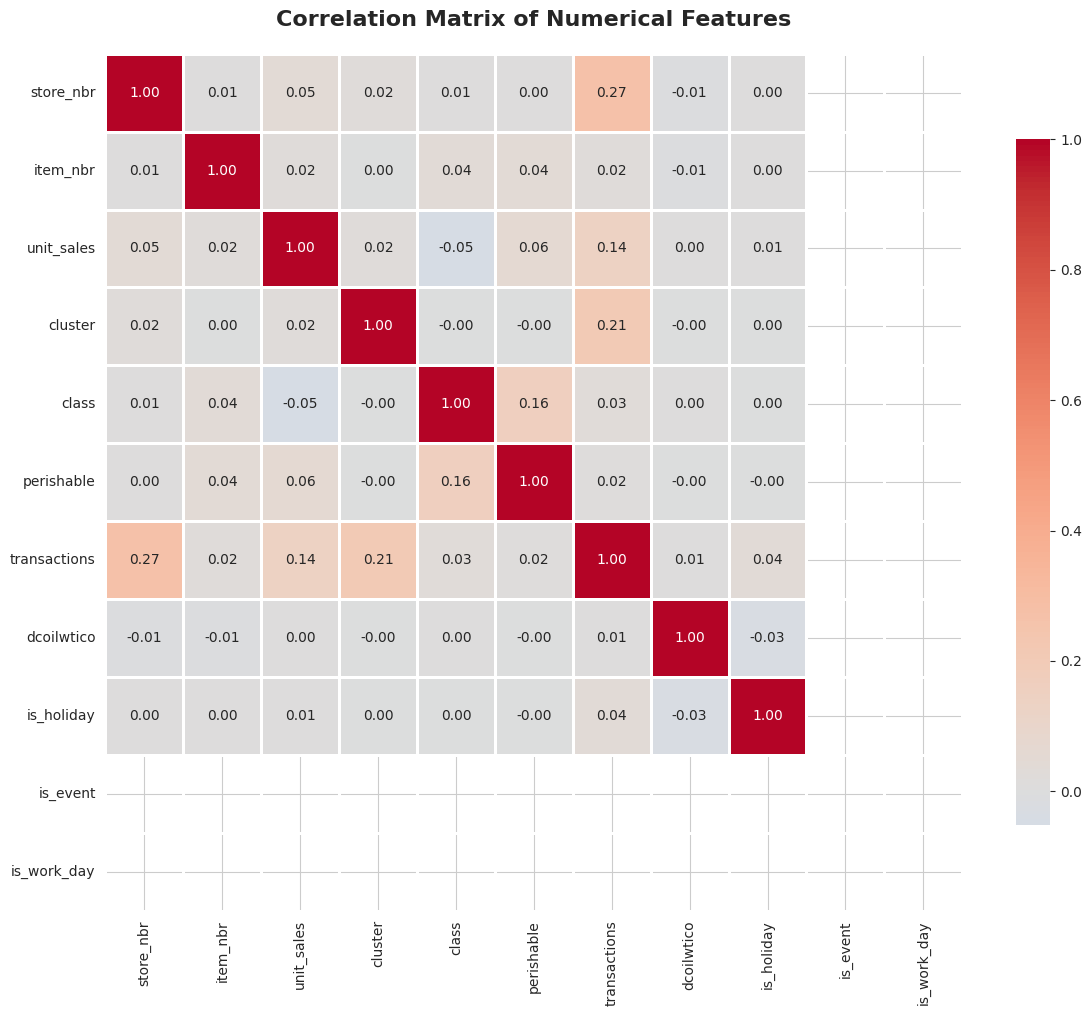


Correlations with Unit Sales (sorted by absolute value):
unit_sales      1.000000
transactions    0.135468
perishable      0.060417
store_nbr       0.045117
item_nbr        0.023928
cluster         0.021973
is_holiday      0.007772
dcoilwtico      0.003242
class          -0.051438
is_event             NaN
is_work_day          NaN
Name: unit_sales, dtype: float64


In [17]:
# Correlation analysis
print("=" * 80)
print("CORRELATION ANALYSIS")
print("=" * 80)

# Select numerical columns for correlation
numerical_features = ['store_nbr', 'item_nbr', 'unit_sales', 'cluster', 'class', 
                      'perishable', 'transactions', 'dcoilwtico', 'is_holiday', 
                      'is_event', 'is_work_day']

correlation_matrix = df_encoded[numerical_features].corr()

# Plot correlation heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm', 
            center=0, square=True, linewidths=1, cbar_kws={"shrink": 0.8})
plt.title('Correlation Matrix of Numerical Features', fontsize=16, fontweight='bold', pad=20)
plt.tight_layout()
plt.show()

# Show correlations with target variable
print("\nCorrelations with Unit Sales (sorted by absolute value):")
target_corr = correlation_matrix['unit_sales'].sort_values(ascending=False)
print(target_corr)

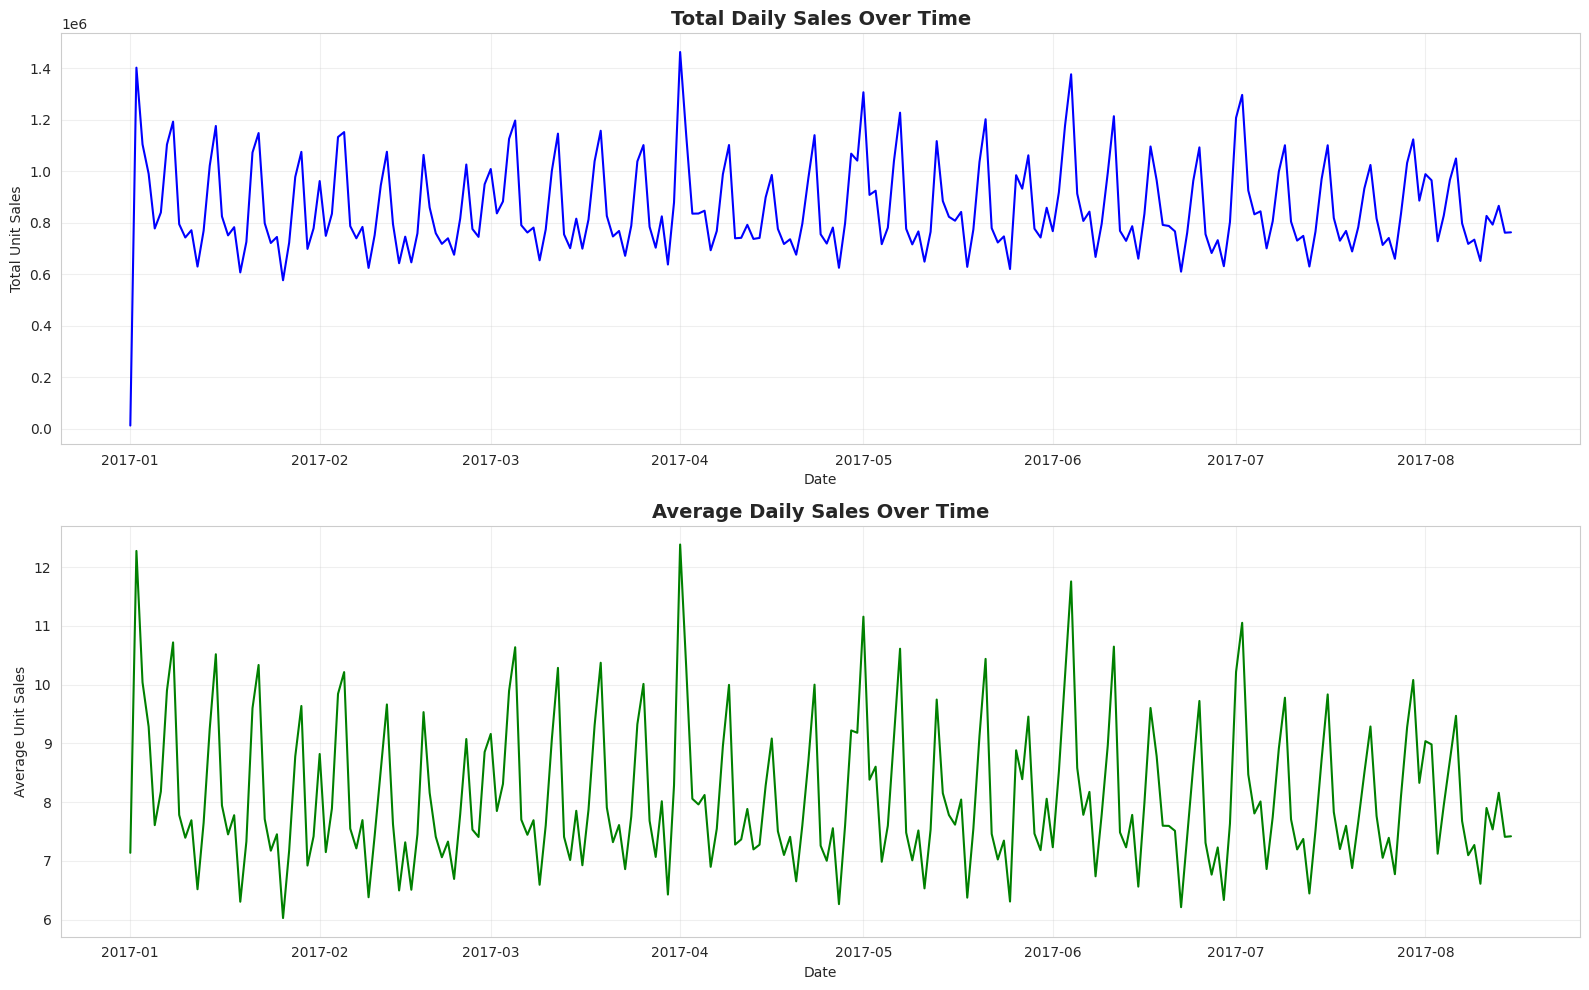

In [18]:
# Temporal analysis - Sales over time
daily_sales = df_encoded.groupby('date')['unit_sales'].agg(['sum', 'mean', 'count']).reset_index()

fig, axes = plt.subplots(2, 1, figsize=(16, 10))

# Total daily sales
axes[0].plot(daily_sales['date'], daily_sales['sum'], linewidth=1.5, color='blue')
axes[0].set_title('Total Daily Sales Over Time', fontsize=14, fontweight='bold')
axes[0].set_xlabel('Date')
axes[0].set_ylabel('Total Unit Sales')
axes[0].grid(alpha=0.3)

# Average daily sales
axes[1].plot(daily_sales['date'], daily_sales['mean'], linewidth=1.5, color='green')
axes[1].set_title('Average Daily Sales Over Time', fontsize=14, fontweight='bold')
axes[1].set_xlabel('Date')
axes[1].set_ylabel('Average Unit Sales')
axes[1].grid(alpha=0.3)

plt.tight_layout()
plt.show()

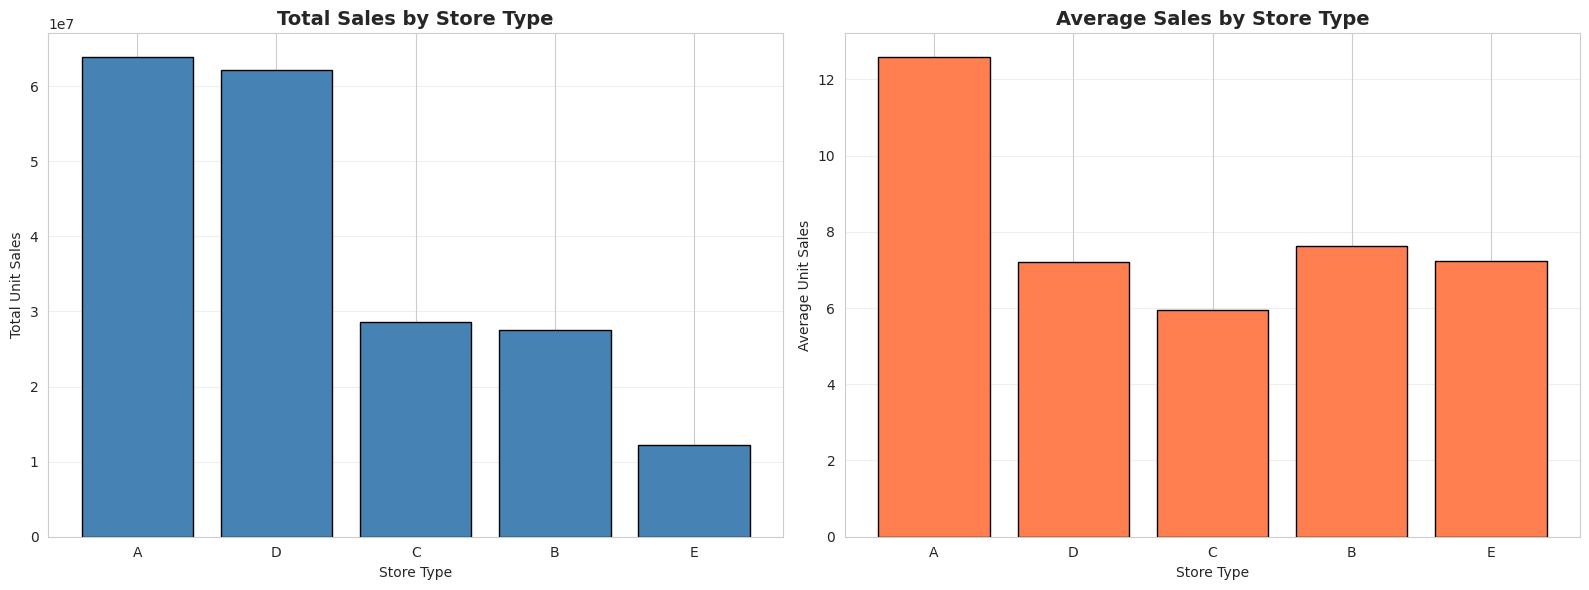


Sales by Store Type:
type          sum      mean
   A 63830659.391 12.577909
   D 62091375.630  7.199423
   C 28552583.254  5.938615
   B 27500760.621  7.630653
   E 12267079.180  7.228656


In [19]:
# Sales by store type
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Sales by store type
store_type_sales = df_encoded.groupby('type')['unit_sales'].agg(['sum', 'mean']).reset_index()
store_type_sales = store_type_sales.sort_values('sum', ascending=False)

axes[0].bar(store_type_sales['type'], store_type_sales['sum'], color='steelblue', edgecolor='black')
axes[0].set_title('Total Sales by Store Type', fontsize=14, fontweight='bold')
axes[0].set_xlabel('Store Type')
axes[0].set_ylabel('Total Unit Sales')
axes[0].grid(alpha=0.3, axis='y')

axes[1].bar(store_type_sales['type'], store_type_sales['mean'], color='coral', edgecolor='black')
axes[1].set_title('Average Sales by Store Type', fontsize=14, fontweight='bold')
axes[1].set_xlabel('Store Type')
axes[1].set_ylabel('Average Unit Sales')
axes[1].grid(alpha=0.3, axis='y')

plt.tight_layout()
plt.show()

print("\nSales by Store Type:")
print(store_type_sales.to_string(index=False))

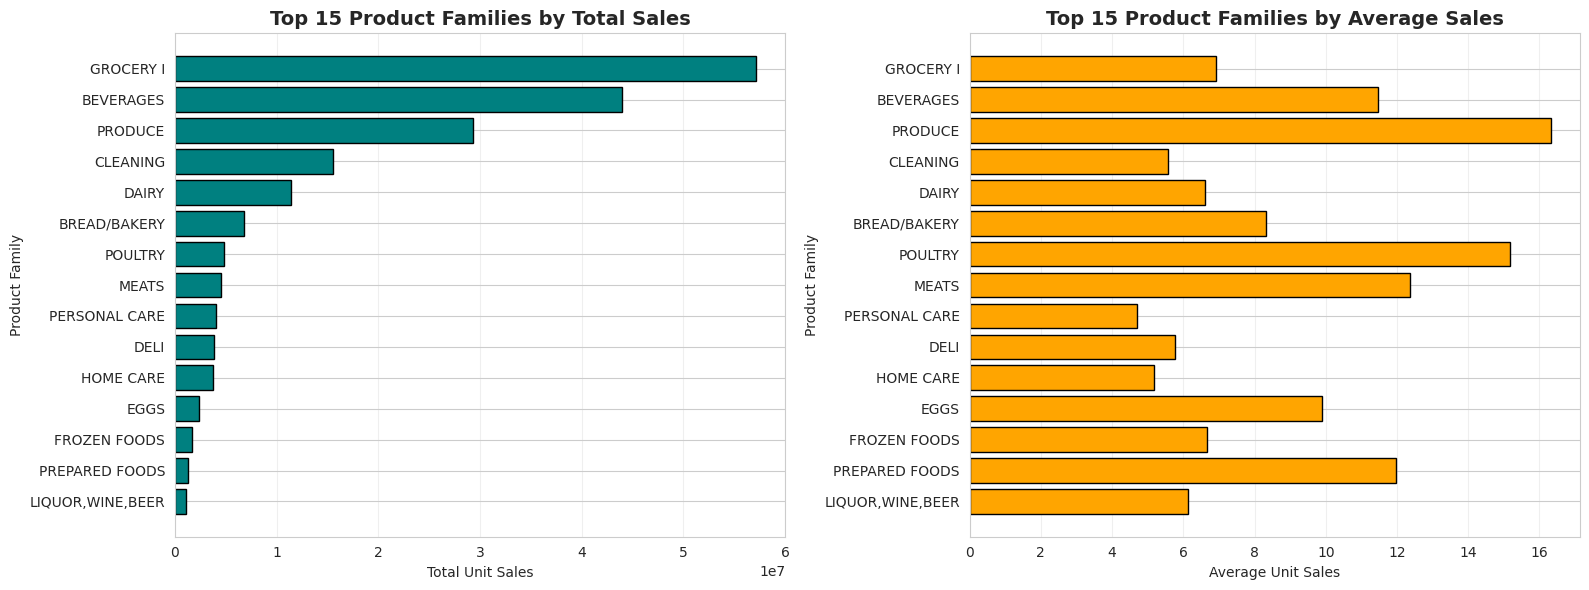

In [20]:
# Sales by product family (top 15)
family_sales = df_encoded.groupby('family')['unit_sales'].agg(['sum', 'mean', 'count']).reset_index()
family_sales = family_sales.sort_values('sum', ascending=False).head(15)

fig, axes = plt.subplots(1, 2, figsize=(16, 6))

axes[0].barh(family_sales['family'], family_sales['sum'], color='teal', edgecolor='black')
axes[0].set_title('Top 15 Product Families by Total Sales', fontsize=14, fontweight='bold')
axes[0].set_xlabel('Total Unit Sales')
axes[0].set_ylabel('Product Family')
axes[0].invert_yaxis()
axes[0].grid(alpha=0.3, axis='x')

axes[1].barh(family_sales['family'], family_sales['mean'], color='orange', edgecolor='black')
axes[1].set_title('Top 15 Product Families by Average Sales', fontsize=14, fontweight='bold')
axes[1].set_xlabel('Average Unit Sales')
axes[1].set_ylabel('Product Family')
axes[1].invert_yaxis()
axes[1].grid(alpha=0.3, axis='x')

plt.tight_layout()
plt.show()

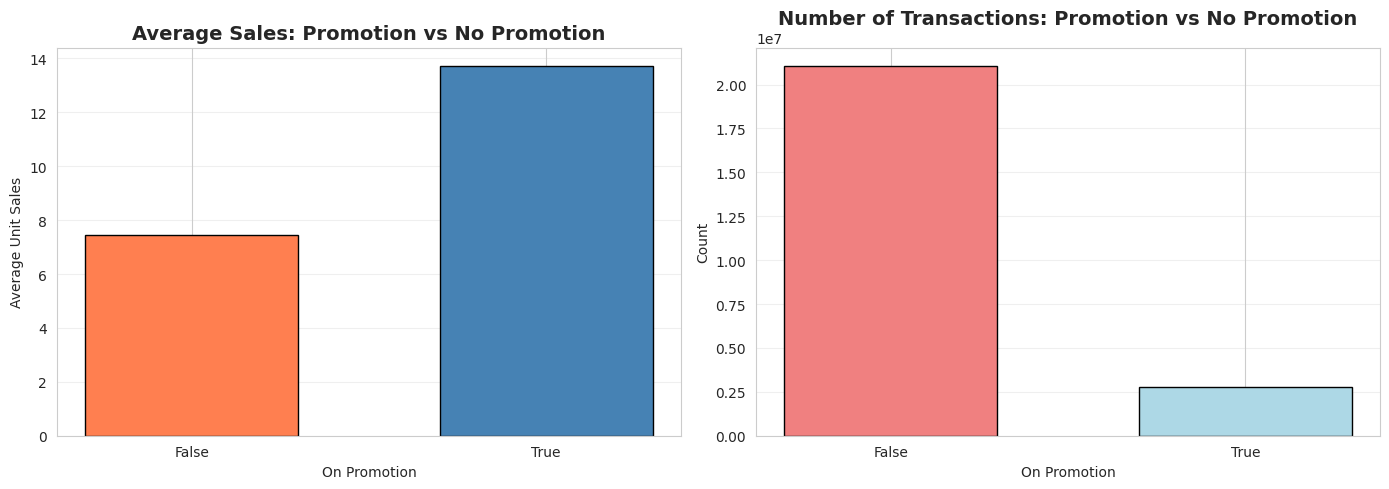


Promotion Impact:
 onpromotion          sum      mean    count
       False 1.565207e+08  7.432624 21058612
        True 3.772171e+07 13.718737  2749649

✓ Promotions increase average sales by 84.57%


In [21]:
# Promotion impact analysis
promotion_sales = df_encoded.groupby('onpromotion')['unit_sales'].agg(['sum', 'mean', 'count']).reset_index()

fig, axes = plt.subplots(1, 2, figsize=(14, 5))

axes[0].bar(promotion_sales['onpromotion'].astype(str), promotion_sales['mean'], 
            color=['coral', 'steelblue'], edgecolor='black', width=0.6)
axes[0].set_title('Average Sales: Promotion vs No Promotion', fontsize=14, fontweight='bold')
axes[0].set_xlabel('On Promotion')
axes[0].set_ylabel('Average Unit Sales')
axes[0].grid(alpha=0.3, axis='y')

axes[1].bar(promotion_sales['onpromotion'].astype(str), promotion_sales['count'], 
            color=['lightcoral', 'lightblue'], edgecolor='black', width=0.6)
axes[1].set_title('Number of Transactions: Promotion vs No Promotion', fontsize=14, fontweight='bold')
axes[1].set_xlabel('On Promotion')
axes[1].set_ylabel('Count')
axes[1].grid(alpha=0.3, axis='y')

plt.tight_layout()
plt.show()

print("\nPromotion Impact:")
print(promotion_sales.to_string(index=False))

# Calculate percentage increase
if len(promotion_sales) == 2:
    promo_mean = promotion_sales[promotion_sales['onpromotion'] == True]['mean'].values[0]
    no_promo_mean = promotion_sales[promotion_sales['onpromotion'] == False]['mean'].values[0]
    pct_increase = ((promo_mean - no_promo_mean) / no_promo_mean) * 100
    print(f"\n✓ Promotions increase average sales by {pct_increase:.2f}%")

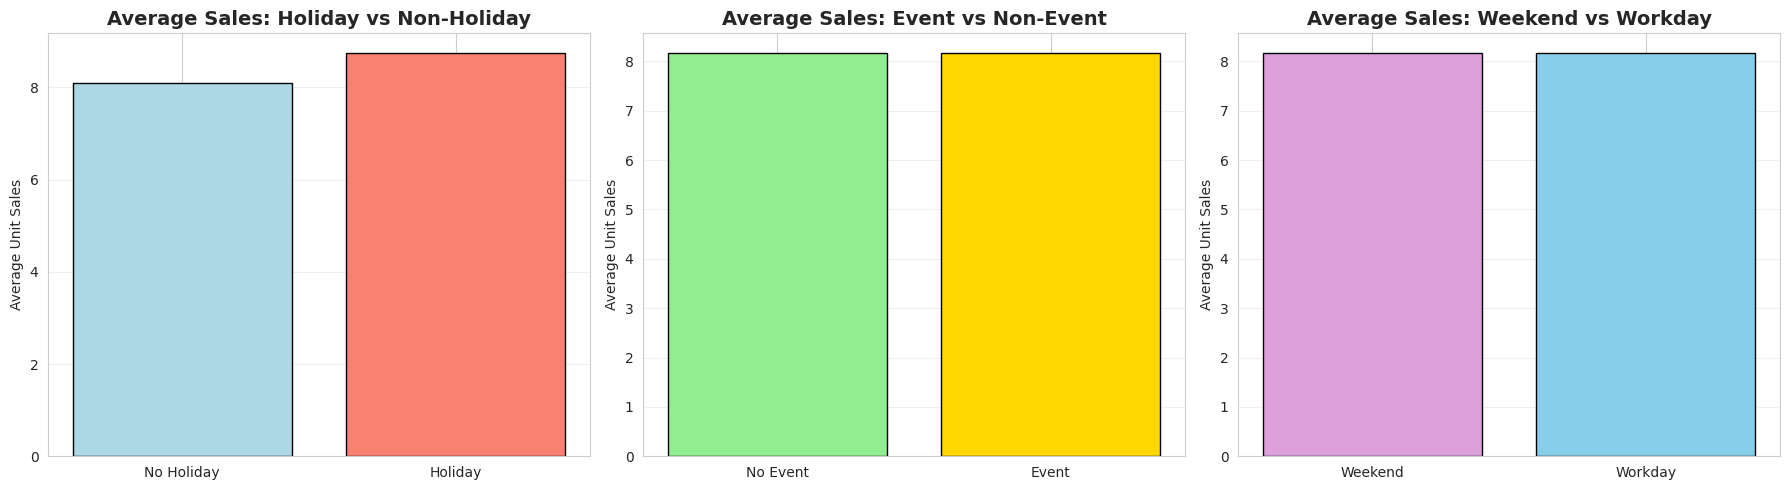

In [22]:
# Holiday and event impact
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# Holiday impact
holiday_sales = df_encoded.groupby('is_holiday')['unit_sales'].mean()
axes[0].bar(['No Holiday', 'Holiday'], holiday_sales.values, color=['lightblue', 'salmon'], edgecolor='black')
axes[0].set_title('Average Sales: Holiday vs Non-Holiday', fontsize=14, fontweight='bold')
axes[0].set_ylabel('Average Unit Sales')
axes[0].grid(alpha=0.3, axis='y')

# Event impact
event_sales = df_encoded.groupby('is_event')['unit_sales'].mean()
axes[1].bar(['No Event', 'Event'], event_sales.values, color=['lightgreen', 'gold'], edgecolor='black')
axes[1].set_title('Average Sales: Event vs Non-Event', fontsize=14, fontweight='bold')
axes[1].set_ylabel('Average Unit Sales')
axes[1].grid(alpha=0.3, axis='y')

# Work day impact
workday_sales = df_encoded.groupby('is_work_day')['unit_sales'].mean()
axes[2].bar(['Weekend', 'Workday'], workday_sales.values, color=['plum', 'skyblue'], edgecolor='black')
axes[2].set_title('Average Sales: Weekend vs Workday', fontsize=14, fontweight='bold')
axes[2].set_ylabel('Average Unit Sales')
axes[2].grid(alpha=0.3, axis='y')

plt.tight_layout()
plt.show()

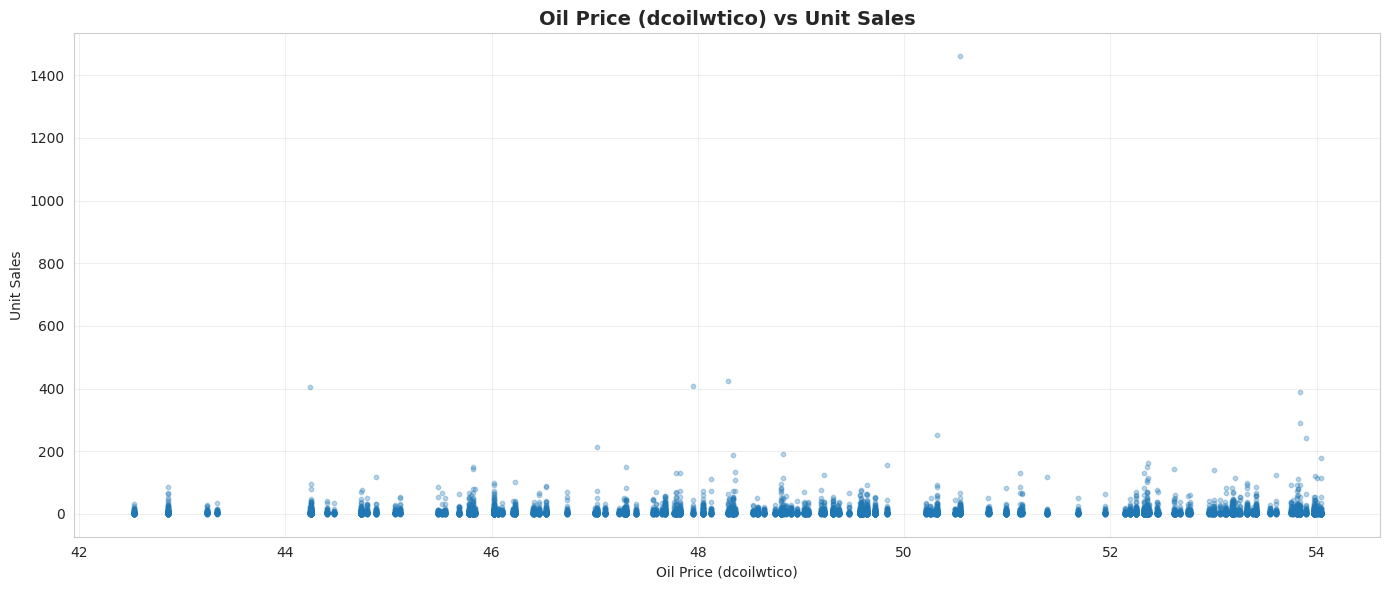

Correlation between oil price and unit sales: 0.0032


In [23]:
# Oil price vs sales relationship
plt.figure(figsize=(14, 6))

# Sample data for better visualization (plotting all points would be too dense)
sample_size = min(10000, len(df_encoded))
sample_df = df_encoded.sample(n=sample_size, random_state=42)

plt.scatter(sample_df['dcoilwtico'], sample_df['unit_sales'], alpha=0.3, s=10)
plt.title('Oil Price (dcoilwtico) vs Unit Sales', fontsize=14, fontweight='bold')
plt.xlabel('Oil Price (dcoilwtico)')
plt.ylabel('Unit Sales')
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

# Calculate correlation
oil_sales_corr = df_encoded[['dcoilwtico', 'unit_sales']].corr().iloc[0, 1]
print(f"Correlation between oil price and unit sales: {oil_sales_corr:.4f}")

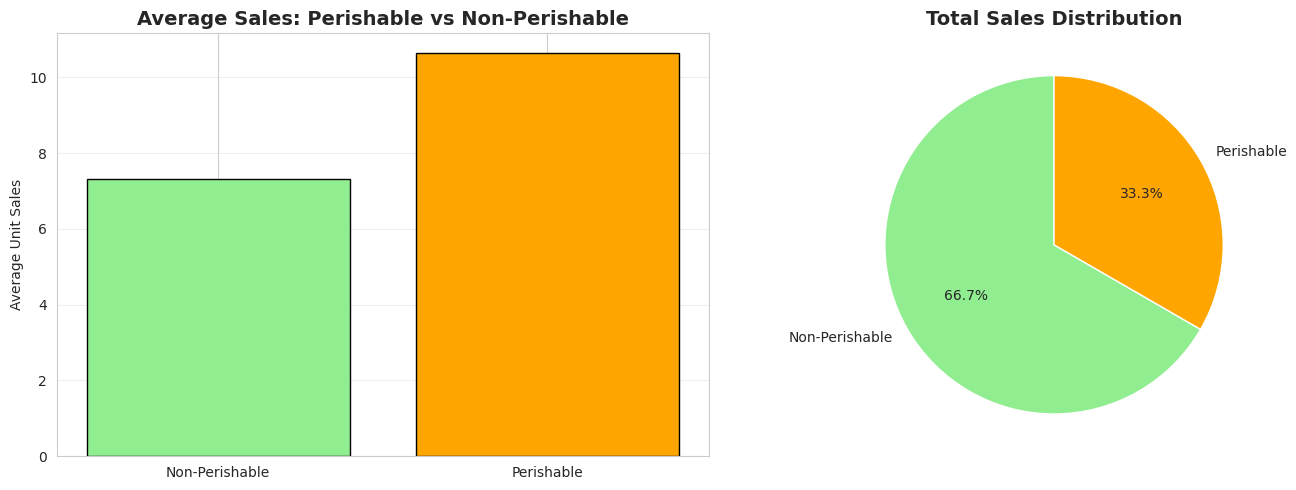


Perishable vs Non-Perishable Sales:
 perishable          sum      mean    count
          0 1.295000e+08  7.309420 17716866
          1 6.474244e+07 10.628509  6091395


In [24]:
# Perishable vs non-perishable products
perishable_sales = df_encoded.groupby('perishable')['unit_sales'].agg(['sum', 'mean', 'count']).reset_index()

fig, axes = plt.subplots(1, 2, figsize=(14, 5))

axes[0].bar(['Non-Perishable', 'Perishable'], perishable_sales['mean'].values, 
            color=['lightgreen', 'orange'], edgecolor='black')
axes[0].set_title('Average Sales: Perishable vs Non-Perishable', fontsize=14, fontweight='bold')
axes[0].set_ylabel('Average Unit Sales')
axes[0].grid(alpha=0.3, axis='y')

axes[1].pie(perishable_sales['sum'].values, labels=['Non-Perishable', 'Perishable'], 
            autopct='%1.1f%%', colors=['lightgreen', 'orange'], startangle=90)
axes[1].set_title('Total Sales Distribution', fontsize=14, fontweight='bold')

plt.tight_layout()
plt.show()

print("\nPerishable vs Non-Perishable Sales:")
print(perishable_sales.to_string(index=False))

## 5. Time Series Feature Engineering (For 14-Day Forecasting)

**Problem Statement**: Predict sales for the next 14 days for specific store-item combinations

This section creates time series specific features:
- Lag features (previous sales)
- Rolling statistics (moving averages, std, min, max)
- Exponential weighted features
- Store-item specific temporal patterns
- Proper train-test split for time series

In [25]:
# Prepare data for time series forecasting
print("=" * 80)
print("TIME SERIES DATA PREPARATION")
print("=" * 80)
# Create a copy for feature engineering
df_features = df_encoded.copy()

# Sort by store, item, and date (CRITICAL for time series)
df_ts = df_features.copy()
df_ts = df_ts.sort_values(['store_nbr', 'item_nbr', 'date']).reset_index(drop=True)

print(f"✓ Data sorted by store_nbr, item_nbr, date")
print(f"Dataset shape: {df_ts.shape}")
print(f"\nDate range: {df_ts['date'].min()} to {df_ts['date'].max()}")
print(f"Number of unique stores: {df_ts['store_nbr'].nunique()}")
print(f"Number of unique items: {df_ts['item_nbr'].nunique()}")
print(f"Number of store-item combinations: {df_ts.groupby(['store_nbr', 'item_nbr']).ngroups:,}")

TIME SERIES DATA PREPARATION
✓ Data sorted by store_nbr, item_nbr, date
Dataset shape: (23808261, 29)

Date range: 2017-01-01 00:00:00 to 2017-08-15 00:00:00
Number of unique stores: 54
Number of unique items: 4018
Number of store-item combinations: 167,515


In [26]:
# Create lag features for each store-item combination

print("=" * 80)
print("CREATING LAG FEATURES IN CHUNKS (per store)")
print("=" * 80)
print("This may take a few minutes...")

lag_days = [1, 2, 3, 7, 14, 21, 28]

# Step 1: sort for correct lagging
df_ts = df_ts.sort_values(['store_nbr', 'item_nbr', 'date']).reset_index(drop=True)
df_ts['orig_index'] = np.arange(len(df_ts))

stores = df_ts['store_nbr'].unique()
chunk_list = []

print(f"Processing {len(stores)} stores...")

for s in stores:
    df_s = df_ts[df_ts['store_nbr'] == s].copy()

    # create lags inside each store
    for lag in lag_days:
        df_s[f'sales_lag_{lag}'] = (
            df_s.groupby('item_nbr')['unit_sales'].shift(lag)
        )

    chunk_list.append(df_s)

# Step 2: combine everything back
df_ts = (
    pd.concat(chunk_list, ignore_index=True)
        .sort_values('orig_index')
        .drop(columns=['orig_index'])
        .reset_index(drop=True)
)

print(f"\n✓ Created {len(lag_days)} lag features in chunked mode.")
print("✓ Finished lag feature generation.")


CREATING LAG FEATURES IN CHUNKS (per store)
This may take a few minutes...
Processing 54 stores...

✓ Created 7 lag features in chunked mode.
✓ Finished lag feature generation.


In [27]:
##CREATING ROLLING WINDOW FEATURES
import os
import numpy as np
import pandas as pd
import pyarrow as pa
import pyarrow.parquet as pq

print("=" * 80)
print("CREATING ROLLING WINDOW FEATURES (chunked → ParquetWriter)")
print("=" * 80)

df_ts = df_ts.sort_values(['store_nbr', 'item_nbr', 'date']).reset_index(drop=True)

output_path = "df_ts_rolling_features.parquet"

# Delete old file if exists
if os.path.exists(output_path):
    os.remove(output_path)

stores = df_ts['store_nbr'].unique()

rolling_windows = [7, 14, 30]
stats = ['mean', 'std', 'min', 'max']

writer = None

print(f"Processing {len(stores)} stores...")

for s in stores:

    # Slice one store
    df_s = df_ts[df_ts["store_nbr"] == s].copy()

    # Rolling stats for each item within this store
    for window in rolling_windows:
        for stat in stats:

            df_s[f'sales_rolling_{stat}_{window}'] = (
                df_s.groupby('item_nbr')['unit_sales']
                    .transform(
                        lambda x: getattr(
                            x.shift(1).rolling(window=window, min_periods=1),
                            stat
                        )()
                    )
            )

    # Write chunk
    table = pa.Table.from_pandas(df_s, preserve_index=False)

    if writer is None:
        writer = pq.ParquetWriter(output_path, table.schema)

    writer.write_table(table)

# Close writer
if writer is not None:
    writer.close()

print("✓ Finished building rolling window features and writing to disk.")
print(f"Saved at: {output_path}")


CREATING ROLLING WINDOW FEATURES (chunked → ParquetWriter)
Processing 54 stores...
✓ Finished building rolling window features and writing to disk.
Saved at: df_ts_rolling_features.parquet


In [1]:
import pandas as pd

df_ts = pd.read_parquet("df_ts_rolling_features.parquet")
print(df_ts.shape)
df_ts.head()


(23808261, 48)


,id,date,store_nbr,item_nbr,unit_sales,onpromotion,city,state,type,cluster,...,sales_rolling_min_7,sales_rolling_max_7,sales_rolling_mean_14,sales_rolling_std_14,sales_rolling_min_14,sales_rolling_max_14,sales_rolling_mean_30,sales_rolling_std_30,sales_rolling_min_30,sales_rolling_max_30
0,111649701,2017-04-07,1,96995,2.0,False,Quito,Pichincha,D,13,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,112696044,2017-04-17,1,96995,1.0,False,Quito,Pichincha,D,13,...,2.0,2.0,2.000000,NaN,2.0,2.0,2.000000,NaN,2.0,2.0
2,113101376,2017-04-21,1,96995,2.0,False,Quito,Pichincha,D,13,...,1.0,2.0,1.500000,0.707107,1.0,2.0,1.500000,0.707107,1.0,2.0
3,113206073,2017-04-22,1,96995,3.0,False,Quito,Pichincha,D,13,...,1.0,2.0,1.666667,0.577350,1.0,2.0,1.666667,0.577350,1.0,2.0
4,113638799,2017-04-26,1,96995,1.0,False,Quito,Pichincha,D,13,...,1.0,3.0,2.000000,0.816497,1.0,3.0,2.000000,0.816497,1.0,3.0


In [2]:
# Create exponentially weighted moving average (EWMA)
print("=" * 80)
print("CREATING EXPONENTIALLY WEIGHTED FEATURES")
print("=" * 80)

# EWMA gives more weight to recent observations
ewma_spans = [7, 14, 30]

for span in ewma_spans:
    df_ts[f'sales_ewm_{span}'] = df_ts.groupby(['store_nbr', 'item_nbr'])['unit_sales'].transform(
        lambda x: x.shift(1).ewm(span=span, min_periods=1).mean()
    )
    print(f"✓ Created exponentially weighted mean with span={span}")

print(f"\n✓ Total EWMA features created: {len(ewma_spans)}")
print("EWMA captures recent trends with exponential decay!")

CREATING EXPONENTIALLY WEIGHTED FEATURES
✓ Created exponentially weighted mean with span=7
✓ Created exponentially weighted mean with span=14
✓ Created exponentially weighted mean with span=30

✓ Total EWMA features created: 3
EWMA captures recent trends with exponential decay!


In [3]:
# Create difference features (change from previous period)
print("=" * 80)
print("CREATING DIFFERENCE FEATURES")
print("=" * 80)

# First difference (day-over-day change)
df_ts['sales_diff_1'] = df_ts.groupby(['store_nbr', 'item_nbr'])['unit_sales'].diff(1)

# Weekly difference (week-over-week change)
df_ts['sales_diff_7'] = df_ts.groupby(['store_nbr', 'item_nbr'])['unit_sales'].diff(7)

# Percentage change
df_ts['sales_pct_change_1'] = df_ts.groupby(['store_nbr', 'item_nbr'])['unit_sales'].pct_change(1)
df_ts['sales_pct_change_7'] = df_ts.groupby(['store_nbr', 'item_nbr'])['unit_sales'].pct_change(7)

print("✓ Created difference features:")
print("  - sales_diff_1: Day-over-day change")
print("  - sales_diff_7: Week-over-week change")
print("  - sales_pct_change_1: Day-over-day % change")
print("  - sales_pct_change_7: Week-over-week % change")

CREATING DIFFERENCE FEATURES
✓ Created difference features:
  - sales_diff_1: Day-over-day change
  - sales_diff_7: Week-over-week change
  - sales_pct_change_1: Day-over-day % change
  - sales_pct_change_7: Week-over-week % change


In [4]:
# Create temporal features (can be done at any time)
print("=" * 80)
print("CREATING TEMPORAL FEATURES")
print("=" * 80)

df_ts['year'] = df_ts['date'].dt.year
df_ts['month'] = df_ts['date'].dt.month
df_ts['day'] = df_ts['date'].dt.day
df_ts['day_of_week'] = df_ts['date'].dt.dayofweek
df_ts['day_of_year'] = df_ts['date'].dt.dayofyear
df_ts['week_of_year'] = df_ts['date'].dt.isocalendar().week
df_ts['quarter'] = df_ts['date'].dt.quarter
df_ts['is_weekend'] = (df_ts['day_of_week'] >= 5).astype(int)
df_ts['is_month_start'] = df_ts['date'].dt.is_month_start.astype(int)
df_ts['is_month_end'] = df_ts['date'].dt.is_month_end.astype(int)

print("✓ Created temporal features:")
print(f"  - year, month, day, day_of_week, day_of_year")
print(f"  - week_of_year, quarter")
print(f"  - is_weekend, is_month_start, is_month_end")
print(f"\nDataFrame shape: {df_ts.shape}")

CREATING TEMPORAL FEATURES
✓ Created temporal features:
  - year, month, day, day_of_week, day_of_year
  - week_of_year, quarter
  - is_weekend, is_month_start, is_month_end

DataFrame shape: (23808261, 65)


In [5]:
## CREATING STORE-ITEM TEMPORAL FEATURES
import os
import numpy as np
import pandas as pd
import pyarrow as pa
import pyarrow.parquet as pq

print("=" * 80)
print("CREATING STORE-ITEM TEMPORAL FEATURES (chunked → ParquetWriter)")
print("=" * 80)

df_ts = df_ts.sort_values(['store_nbr', 'item_nbr', 'date']).reset_index(drop=True)

output_path = "df_ts_temporal_features.parquet"

# Remove old file if exists
if os.path.exists(output_path):
    os.remove(output_path)

stores = df_ts['store_nbr'].unique()
print(f"Processing {len(stores)} stores...")

# ParquetWriter will be created after first chunk
writer = None

for s in stores:

    # ------------- Extract one store -------------
    df_s = df_ts[df_ts['store_nbr'] == s].copy()

    # ----------------- Features -------------------
    df_s['store_item_dow_avg_sales'] = (
        df_s.groupby(['item_nbr', 'day_of_week'])['unit_sales']
            .transform('mean')
    )

    df_s['store_item_month_avg_sales'] = (
        df_s.groupby(['item_nbr', 'month'])['unit_sales']
            .transform('mean')
    )

    df_s['promo_lag_7'] = (
        df_s.groupby('item_nbr')['onpromotion'].shift(7).astype(float)
    )

    df_s['promo_lag_14'] = (
        df_s.groupby('item_nbr')['onpromotion'].shift(14).astype(float)
    )

    df_s['promo_rolling_30'] = (
        df_s.groupby('item_nbr')['onpromotion']
            .transform(lambda x: x.shift(1).rolling(window=30, min_periods=1).mean())
    )

    # Convert to Arrow Table
    table = pa.Table.from_pandas(df_s, preserve_index=False)

    # ---------------- Write chunk -----------------
    if writer is None:
        # First chunk → initialize ParquetWriter with schema
        writer = pq.ParquetWriter(output_path, table.schema)

    writer.write_table(table)

# Close writer at the end
if writer is not None:
    writer.close()

print("✓ Finished writing chunked temporal features to Parquet!")
print(f"Saved at: {output_path}")


CREATING STORE-ITEM TEMPORAL FEATURES (chunked → ParquetWriter)
Processing 54 stores...
✓ Finished writing chunked temporal features to Parquet!
Saved at: df_ts_temporal_features.parquet


In [1]:
import pandas as pd

df_ts = pd.read_parquet("df_ts_temporal_features.parquet")
print(df_ts.shape)
df_ts.head()


(23808261, 70)


,id,date,store_nbr,item_nbr,unit_sales,onpromotion,city,state,type,cluster,...,week_of_year,quarter,is_weekend,is_month_start,is_month_end,store_item_dow_avg_sales,store_item_month_avg_sales,promo_lag_7,promo_lag_14,promo_rolling_30
0,111649701,2017-04-07,1,96995,2.0,False,Quito,Pichincha,D,13,...,14,2,0,0,0,1.666667,1.666667,NaN,NaN,NaN
1,112696044,2017-04-17,1,96995,1.0,False,Quito,Pichincha,D,13,...,16,2,0,0,0,1.500000,1.666667,NaN,NaN,0.0
2,113101376,2017-04-21,1,96995,2.0,False,Quito,Pichincha,D,13,...,16,2,0,0,0,1.666667,1.666667,NaN,NaN,0.0
3,113206073,2017-04-22,1,96995,3.0,False,Quito,Pichincha,D,13,...,16,2,1,0,0,2.000000,1.666667,NaN,NaN,0.0
4,113638799,2017-04-26,1,96995,1.0,False,Quito,Pichincha,D,13,...,17,2,0,0,0,1.000000,1.666667,NaN,NaN,0.0


In [2]:
# Create trend features
print("=" * 80)
print("CREATING TREND FEATURES")
print("=" * 80)

# Days since first sale for each store-item
df_ts['days_since_first_sale'] = df_ts.groupby(['store_nbr', 'item_nbr']).cumcount()

# Ratio of current sales to rolling mean (momentum indicator)
df_ts['sales_momentum_7'] = df_ts['unit_sales'] / (df_ts['sales_rolling_mean_7'] + 1)


print("✓ Created trend features:")
print("  - days_since_first_sale: Time since item first appeared in store")
print("  - sales_momentum_7: Current sales vs rolling average")

CREATING TREND FEATURES
✓ Created trend features:
  - days_since_first_sale: Time since item first appeared in store
  - sales_momentum_7: Current sales vs rolling average


In [3]:
# Handle missing values from lag/rolling features
print("=" * 80)
print("HANDLING MISSING VALUES FROM TIME SERIES FEATURES")
print("=" * 80)

# Check missing values
missing_after_ts = df_ts.isnull().sum()
missing_after_ts = missing_after_ts[missing_after_ts > 0].sort_values(ascending=False)

print(f"Columns with missing values: {len(missing_after_ts)}")
if len(missing_after_ts) > 0:
    print("\nTop 10 columns with missing values:")
    print(missing_after_ts.head(10))
    
    # Fill missing values with 0 for lag/rolling features (represents no history)
    lag_rolling_cols = [col for col in df_ts.columns if any(x in col for x in ['lag_', 'rolling_', 'ewm_', 'diff_', 'pct_change', 'momentum', 'promo_lag', 'promo_rolling'])]
    
    for col in lag_rolling_cols:
        if df_ts[col].isnull().sum() > 0:
            df_ts[col] = df_ts[col].fillna(0)
    
    print(f"\n✓ Filled missing values in {len(lag_rolling_cols)} time series feature columns with 0")
else:
    print("✓ No missing values found!")

HANDLING MISSING VALUES FROM TIME SERIES FEATURES
Columns with missing values: 30

Top 10 columns with missing values:
sales_lag_28          4494340
sales_lag_21          3405625
promo_lag_14          2293627
sales_lag_14          2293627
sales_pct_change_7    1158774
sales_lag_7           1158768
promo_lag_7           1158768
sales_diff_7          1158768
sales_lag_3            500063
sales_lag_2            334105
dtype: int64

✓ Filled missing values in 30 time series feature columns with 0


In [4]:
## Creating Full / Train / Test data files (CHUNKED BY STORE)
import pandas as pd
import pyarrow as pa
import pyarrow.parquet as pq
import gc

print("=" * 80)
print("SAVING FULL / TRAIN / TEST PARQUET FILES (chunked by store)")
print("=" * 80)

# 1. Ensure date is datetime & sorted
df_ts["date"] = pd.to_datetime(df_ts["date"])
df_ts = df_ts.sort_values(["store_nbr", "item_nbr", "date"]).reset_index(drop=True)

# 2. Compute time-series split: last 14 days = test
max_date = df_ts["date"].max()
split_date = max_date - pd.Timedelta(days=14)

print(f"Max date   : {max_date}")
print(f"Split date : {split_date}")

full_output  = "train_2017_ts_features_full.parquet"
train_output = "train_2017_ts_train.parquet"
test_output  = "train_2017_ts_test.parquet"

# Remove old files if they exist
import os
for path in [full_output, train_output, test_output]:
    if os.path.exists(path):
        os.remove(path)

# 3. Set up ParquetWriters (will be created after first chunk)
full_writer = None
train_writer = None
test_writer = None

stores = df_ts["store_nbr"].unique()
print(f"Total stores: {len(stores)}")

for i, s in enumerate(stores, start=1):
    # Work on one store at a time
    df_s = df_ts[df_ts["store_nbr"] == s].copy()

    # -------- FULL ----------
    table_full = pa.Table.from_pandas(df_s, preserve_index=False)
    if full_writer is None:
        full_writer = pq.ParquetWriter(full_output, table_full.schema)
    full_writer.write_table(table_full)

    # -------- TRAIN ----------
    df_train_s = df_s[df_s["date"] <= split_date]
    if not df_train_s.empty:
        table_train = pa.Table.from_pandas(df_train_s, preserve_index=False)
        if train_writer is None:
            train_writer = pq.ParquetWriter(train_output, table_train.schema)
        train_writer.write_table(table_train)

    # -------- TEST ----------
    df_test_s = df_s[df_s["date"] > split_date]
    if not df_test_s.empty:
        table_test = pa.Table.from_pandas(df_test_s, preserve_index=False)
        if test_writer is None:
            test_writer = pq.ParquetWriter(test_output, table_test.schema)
        test_writer.write_table(table_test)

    # free chunk memory
    del df_s, df_train_s, df_test_s, table_full
    gc.collect()

    if i % 5 == 0 or i == len(stores):
        print(f"  Processed {i}/{len(stores)} stores")

# 4. Close writers
if full_writer is not None:
    full_writer.close()
if train_writer is not None:
    train_writer.close()
if test_writer is not None:
    test_writer.close()

print("\n" + "=" * 80)
print("ALL PARQUET FILES SAVED SUCCESSFULLY!")
print(f"FULL  → {full_output}")
print(f"TRAIN → {train_output}")
print(f"TEST  → {test_output}")
print("=" * 80)

# Optional: you can now safely drop df_ts if you want
# del df_ts
# gc.collect()


SAVING FULL / TRAIN / TEST PARQUET FILES (chunked by store)
Max date   : 2017-08-15 00:00:00
Split date : 2017-08-01 00:00:00
Total stores: 54
  Processed 5/54 stores
  Processed 10/54 stores
  Processed 15/54 stores
  Processed 20/54 stores
  Processed 25/54 stores
  Processed 30/54 stores
  Processed 35/54 stores
  Processed 40/54 stores
  Processed 45/54 stores
  Processed 50/54 stores
  Processed 54/54 stores

ALL PARQUET FILES SAVED SUCCESSFULLY!
FULL  → train_2017_ts_features_full.parquet
TRAIN → train_2017_ts_train.parquet
TEST  → train_2017_ts_test.parquet


## Summary


### 1. Data Cleaning 
- Checked missing values
- Identified handled duplicates
- Detected outliers using IQR method
- Validated data types
- **Removed log_sales feature** (unit_sales is the target variable)

### 2. Data Preprocessing 
- Analyzed categorical variables
- Converted onpromotion to boolean
- Label encoded categorical features (city, state, type, family)
- Standardized numerical features (Z-score normalization)
- Min-max normalized features (0-1 scaling)

### 3. Exploratory Data Analysis 
- Statistical summaries of all features
- Distribution analysis of target variable (unit_sales)
- Correlation analysis between features
- Temporal patterns and trends
- Store type and product family analysis
- Promotion impact analysis
- Holiday, event, and workday effects
- Oil price relationship with sales
- Perishable vs non-perishable comparison

### 4. Feature Engineering

**Problem Statement**: Predict sales for the next 14 days for specific store-item combinations

This section creates time series specific features:
- Lag features (previous sales)
- Rolling statistics (moving averages, std, min, max)
- Exponential weighted features
- Store-item specific temporal patterns
- Proper train-test split for time series

### Next Steps
The dataset is now ready for:
- Machine learning model training
- Time series forecasting
- Advanced analytics
- Predictive modeling

**Target Variable**: `unit_sales`

## Next Steps for Model Building

### 1. **Model Selection** (Choose based on your needs)
   - **ARIMA/SARIMA**: Classical time series (per store-item)
   - **Prophet**: Facebook's forecasting tool (handles seasonality well)
   - **XGBoost/LightGBM**: Gradient boosting (fast, handles many features)
   - **LSTM/GRU**: Deep learning (captures complex patterns)
   - **Ensemble**: Combine multiple models

### 2. **Parallelization with mpi4py**
   - Split store-item combinations across processes
   - Each process handles subset of store-item pairs
   - Aggregate predictions at the end
   - Example: 54 stores × 4,100 items = ~221,400 combinations to parallelize

### 3. **Model Training Strategy**
   ```python
   # Pseudo-code for parallel training
   from mpi4py import MPI
   
   comm = MPI.COMM_WORLD
   rank = comm.Get_rank()
   size = comm.Get_size()
   
   # Split store-item combinations
   store_item_pairs = get_all_combinations()
   my_pairs = split_work(store_item_pairs, rank, size)
   
   # Train models for my subset
   for store, item in my_pairs:
       model = train_model(store, item)
       predictions = model.predict(14_days)
       save_predictions(store, item, predictions)
   ```

### 4. **Evaluation Metrics**
   - **RMSE**: Root Mean Squared Error
   - **MAE**: Mean Absolute Error
   - **MAPE**: Mean Absolute Percentage Error
   - **SMAPE**: Symmetric MAPE

### 5. **Feature Importance Analysis**
   - Identify which features contribute most to predictions
   - Remove low-importance features to speed up training
   - Helps understand business drivers



In [1]:
import pandas as pd

df_ts = pd.read_parquet("train_2017_ts_features_full.parquet")
print(df_ts.shape)
df_ts.head()


(23808261, 72)


,id,date,store_nbr,item_nbr,unit_sales,onpromotion,city,state,type,cluster,...,is_weekend,is_month_start,is_month_end,store_item_dow_avg_sales,store_item_month_avg_sales,promo_lag_7,promo_lag_14,promo_rolling_30,days_since_first_sale,sales_momentum_7
0,111649701,2017-04-07,1,96995,2.0,False,Quito,Pichincha,D,13,...,0,0,0,1.666667,1.666667,0.0,0.0,0.0,0,0.000000
1,112696044,2017-04-17,1,96995,1.0,False,Quito,Pichincha,D,13,...,0,0,0,1.500000,1.666667,0.0,0.0,0.0,1,0.333333
2,113101376,2017-04-21,1,96995,2.0,False,Quito,Pichincha,D,13,...,0,0,0,1.666667,1.666667,0.0,0.0,0.0,2,0.800000
3,113206073,2017-04-22,1,96995,3.0,False,Quito,Pichincha,D,13,...,1,0,0,2.000000,1.666667,0.0,0.0,0.0,3,1.125000
4,113638799,2017-04-26,1,96995,1.0,False,Quito,Pichincha,D,13,...,0,0,0,1.000000,1.666667,0.0,0.0,0.0,4,0.333333


In [7]:
df_ts = pd.read_parquet("train_2017_ts_train.parquet")
print(df_ts.shape)

(22346680, 72)


In [6]:
df_ts = pd.read_parquet("train_2017_ts_test.parquet")
print(df_ts.shape)

(1461581, 72)


In [9]:
df_ts.columns


Index(['id', 'date', 'store_nbr', 'item_nbr', 'unit_sales', 'onpromotion',
       'city', 'state', 'type', 'cluster', 'family', 'class', 'perishable',
       'transactions', 'dcoilwtico', 'is_holiday', 'is_event', 'is_work_day',
       'unit_sales_raw', 'city_encoded', 'state_encoded', 'type_encoded',
       'family_encoded', 'unit_sales_scaled', 'transactions_scaled',
       'dcoilwtico_scaled', 'unit_sales_minmax', 'transactions_minmax',
       'dcoilwtico_minmax', 'sales_lag_1', 'sales_lag_2', 'sales_lag_3',
       'sales_lag_7', 'sales_lag_14', 'sales_lag_21', 'sales_lag_28',
       'sales_rolling_mean_7', 'sales_rolling_std_7', 'sales_rolling_min_7',
       'sales_rolling_max_7', 'sales_rolling_mean_14', 'sales_rolling_std_14',
       'sales_rolling_min_14', 'sales_rolling_max_14', 'sales_rolling_mean_30',
       'sales_rolling_std_30', 'sales_rolling_min_30', 'sales_rolling_max_30',
       'sales_ewm_7', 'sales_ewm_14', 'sales_ewm_30', 'sales_diff_1',
       'sales_diff_7', 'sale

In [2]:
list(df_ts.columns)


['id',
 'date',
 'store_nbr',
 'item_nbr',
 'unit_sales',
 'onpromotion',
 'city',
 'state',
 'type',
 'cluster',
 'family',
 'class',
 'perishable',
 'transactions',
 'dcoilwtico',
 'is_holiday',
 'is_event',
 'is_work_day',
 'unit_sales_raw',
 'city_encoded',
 'state_encoded',
 'type_encoded',
 'family_encoded',
 'unit_sales_scaled',
 'transactions_scaled',
 'dcoilwtico_scaled',
 'unit_sales_minmax',
 'transactions_minmax',
 'dcoilwtico_minmax',
 'sales_lag_1',
 'sales_lag_2',
 'sales_lag_3',
 'sales_lag_7',
 'sales_lag_14',
 'sales_lag_21',
 'sales_lag_28',
 'sales_rolling_mean_7',
 'sales_rolling_std_7',
 'sales_rolling_min_7',
 'sales_rolling_max_7',
 'sales_rolling_mean_14',
 'sales_rolling_std_14',
 'sales_rolling_min_14',
 'sales_rolling_max_14',
 'sales_rolling_mean_30',
 'sales_rolling_std_30',
 'sales_rolling_min_30',
 'sales_rolling_max_30',
 'sales_ewm_7',
 'sales_ewm_14',
 'sales_ewm_30',
 'sales_diff_1',
 'sales_diff_7',
 'sales_pct_change_1',
 'sales_pct_change_7',
 'ye